In [9]:
from skimage import io
from skimage import exposure
from skimage import filters
from skimage import util
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

# Projet

Algo Otsu

129


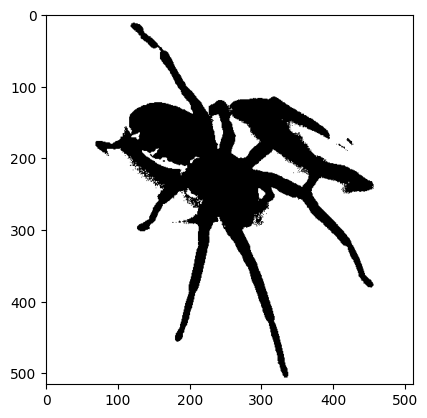

In [5]:
PetiteBete = io.imread('Image/PetiteBete.pgm')
PetiteBete = util.img_as_float(PetiteBete)

def otsu(I):
    max = 0
    threshold = 0
    x = I
    hist = np.array(exposure.histogram(x))
    for i in range(len(hist[0])):
        g1 = np.sum(hist[0][:i])
        g2 = np.sum(hist[0][i:])
        if g1 == 0 or g2 == 0:
            continue
        u1 = np.average(np.arange(i), weights=hist[0][:i])
        u2 = np.average(np.arange(i, len(hist[0])), weights=hist[0][i:])
        Iinter = (g1 * g2 / np.sum(hist)) * (u1 - u2) ** 2
        if max < Iinter:
            max = Iinter
            threshold = i
    return threshold

def bin2(y,t):
    tab = y
    for i in range (len(y)):
        for j in range(len(y[0])):
            if(tab[i][j]*255>t):
                tab[i][j] = 1
            else :
                tab[i][j] = 0
    return tab


print(otsu(PetiteBete))
plt.imshow(bin2(PetiteBete,otsu(PetiteBete)),cmap='gray')
plt.show()


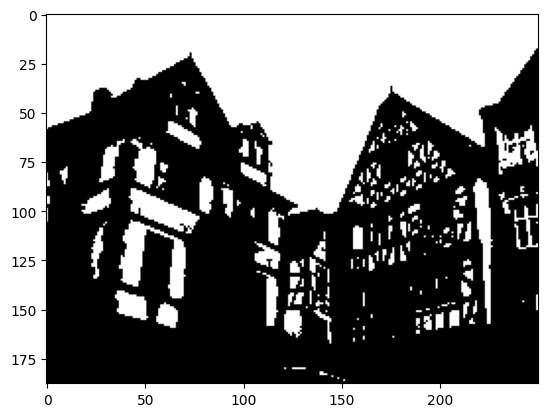

In [7]:
maison = io.imread('Image/maisons.pgm')
maison = util.img_as_float(maison)
plt.imshow(bin2(maison,otsu(maison)),cmap='gray')
plt.show()

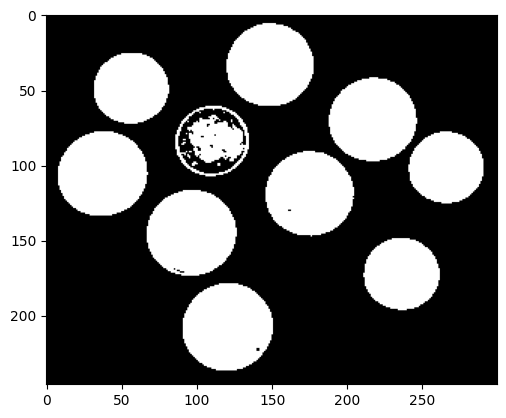

In [8]:
coins = io.imread('Image/coins.pgm')
coins = util.img_as_float(coins)
plt.imshow(bin2(coins,otsu(coins)),cmap='gray')
plt.show()